In [24]:
%matplotlib inline
import math,sys,os,numpy as np
# numpy's linear algebra
from numpy.linalg import norm
# Python imaging library
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
# Scipy's multi-dimentional image processing
from scipy.ndimage import imread
# Scikit-learn image processing
from skimage.measure import block_reduce
import cPickle as pickle
from scipy.ndimage.filters import correlate, convolve
# Jupyter widgets
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [12]:
# Load MNIST data set from tensorflow and save as numpy format
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
images, labels = mnist.train.images, mnist.train.labels
images = images.reshape((55000,28,28))
np.savez_compressed("MNIST_data/train", images=images, labels=labels)

1

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


1

In [77]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    # Create a figure, the figsize seems not matter
    f = plt.figure(figsize=(12,12))
    for i in range(len(ims)):
        # Add subplot, but not sure what those parameters mean
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    # The following one line seems useless.
    # Seems figsize's smaller dimension determins the actual figure size
    f = plt.figure(figsize=(3,3), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [28]:
data = np.load("MNIST_data/train.npz")
images=data['images']
labels=data['labels']
n=len(images)
images.shape

(55000, 28, 28)

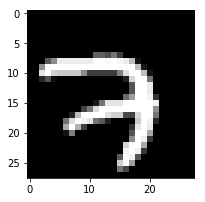

In [34]:
plot(images[0])

In [35]:
labels[0]

7

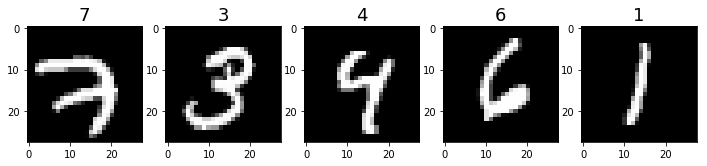

In [62]:
plots(images[:5], titles=labels[:5])

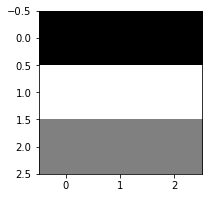

In [75]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

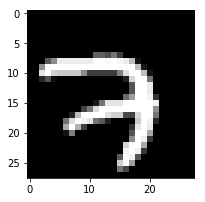

In [86]:
r=(0,28)
def zoomim(x1=0,x2=28,y1=0,y2=28):
    plot(images[0,y1:y2,x1:x2])
w = interactive(zoomim, x1=r,x2=r,y1=r,y2=r)
w

In [ ]:
k=w.kwargs
dims = np.index_exp[k['y1']:k['y2']:1,k['x1']:k['x2']]
print(dims)
images[0][dims]
# images[0]

In [90]:
# scipy.ndimage.filters.correlate
corrtop = correlate(images[0], top)

In [ ]:
corrtop

In [92]:
corrtop[dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , 

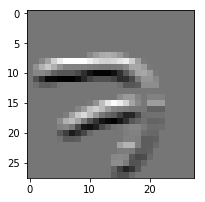

In [93]:
plot(corrtop[dims])

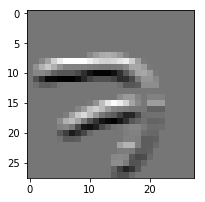

In [107]:
plot(corrtop)

A convolution is essentially a correlation after mirroring the kernel. As a result, the origin parameter behaves differently than in the case of a correlation: the results is shifted in the opposite direction.

### 卷积的物理意义
f(t) 是信号相对于时间的函数, g(t) 是系统对于信号的响应相对于时间的函数
那么在某个时刻, 系统对于信号的响应的叠加, 即为 f(t)*g(t-x), 在 x 上的积分
卷积公式只适用于 **线性时不变系统**, 线性表示系统的响应相对于信号是线性的, 时不变表示信号和系统对信号的响应的函数与时刻无关

True

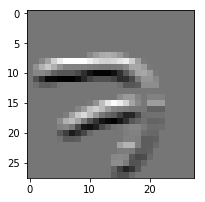

In [112]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

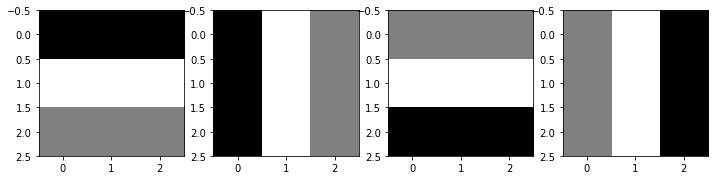

In [113]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

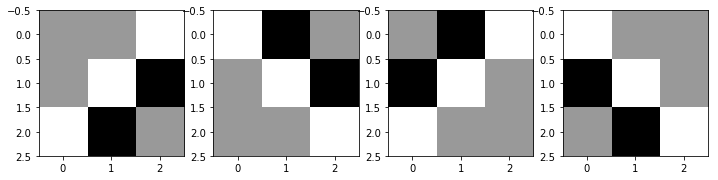

In [116]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

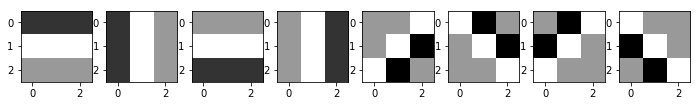

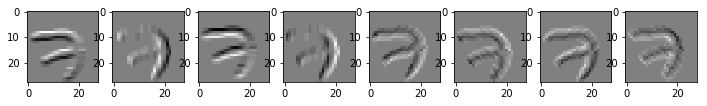

In [118]:
rots = straights + diags
plots(rots)
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)

In [ ]:
def pool(im): return block_reduce(im, (7,7), np.max)

plots([pool(im) for im in corrs])

In [ ]:
eights=[images[i] for i in xrange(n) if labels[i]==8]
ones=[images[i] for i in xrange(n) if labels[i]==1]

In [ ]:
plots(eights[:5])
plots(ones[:5])

In [ ]:
pool8 = [np.array([pool(correlate(im, rot)) for im in eights]) for rot in rots]

In [ ]:
len(pool8), pool8[0].shape

In [ ]:
plots(pool8[0][0:5])

In [ ]:
def normalize(arr): return (arr-arr.mean())/arr.std()

In [ ]:
filts8 = np.array([ims.mean(axis=0) for ims in pool8])
filts8 = normalize(filts8)

In [ ]:
plots(filts8)

In [ ]:
pool1 = [np.array([pool(correlate(im, rot)) for im in ones]) for rot in rots]
filts1 = np.array([ims.mean(axis=0) for ims in pool1])
filts1 = normalize(filts1)

In [ ]:
plots(filts1)

In [ ]:
def pool_corr(im): return np.array([pool(correlate(im, rot)) for rot in rots])

In [ ]:
plots(pool_corr(eights[0]))

In [ ]:
def sse(a,b): return ((a-b)**2).sum()
def is8_n2(im): return 1 if sse(pool_corr(im),filts1) > sse(pool_corr(im),filts8) else 0

In [ ]:
sse(pool_corr(eights[0]), filts8), sse(pool_corr(eights[0]), filts1)

In [ ]:
[np.array([is8_n2(im) for im in ims]).sum() for ims in [eights,ones]]

In [ ]:
[np.array([(1-is8_n2(im)) for im in ims]).sum() for ims in [eights,ones]]

In [ ]:
def n1(a,b): return (np.fabs(a-b)).sum()
def is8_n1(im): return 1 if n1(pool_corr(im),filts1) > n1(pool_corr(im),filts8) else 0

In [ ]:
[np.array([is8_n1(im) for im in ims]).sum() for ims in [eights,ones]]

In [ ]:
[np.array([(1-is8_n1(im)) for im in ims]).sum() for ims in [eights,ones]]